Importing

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, regularizers
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

MAIN_DIR = "D:\\College_Semesters\\6th Semester\\C. Deep Learning for Signal & Image Processing\\Project_New\\Dataset"
SEED = 40
os.listdir(MAIN_DIR)

['aii ki matra',
 'cha',
 'ee ki matra',
 'ka',
 'la',
 'ma',
 'ma with oo ki matra',
 'nna',
 'nnna',
 'nu',
 'nuu',
 'oo',
 'pa',
 'ra',
 't',
 'tha',
 'va',
 'vee',
 'vu',
 'y',
 'ya']

In [3]:
def load_images(folder):
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                if img.shape[-1] == 1:
                    # convert grayscale image to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                img = cv2.resize(img,(224,224))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1
    
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [4]:
data, labels = load_images(MAIN_DIR)

In [5]:
labels.shape

(2698,)

In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)

y_one_hot = to_categorical(y, num_classes=21) # One-hot encode the target variable

norm_data = data / 255. 
norm_data.shape, norm_data[0]

((2698, 224, 224, 3),
 array([[[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        [[0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         [0.19607843, 0.36862745, 0.52941176],
         ...,
         [0.19215686, 0.4       , 0.50588235],
         [0.19215686, 0.40392157, 0.50196078],
         [0.19215686, 0.40392157, 0.50196078]],
 
        ...,
 
        [[0.16470588, 0.36862745, 0.48627451],
         [0.1647058

In [8]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Data Shape:", test_data.shape)
print("Test Labels Shape:", test_labels.shape)

Train Data Shape: (2158, 224, 224, 3)
Train Labels Shape: (2158,)
Test Data Shape: (540, 224, 224, 3)
Test Labels Shape: (540,)


In [10]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=21)
test_labels = to_categorical(test_labels, num_classes=21)

In [11]:
# from tensorflow import keras

# lambda_ = 1e-3
# model = keras.Sequential()

# # Add the layers
# model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=norm_data.shape[1:]))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(512, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(256, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(18, activation='softmax'))


# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Fit the model
# history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

In [12]:
from tensorflow import keras

lambda_ = 1e-3

model = keras.Sequential()

# Add the layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(lambda_), input_shape=norm_data.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(lambda_)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(lambda_)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(lambda_)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(lambda_)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(lambda_)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(lambda_)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(21, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/50
68/68 [==============================] - 124s 2s/step - loss: 8.5839 - accuracy: 0.0612 - val_loss: 4.7887 - val_accuracy: 0.0685
Epoch 2/50
68/68 [==============================] - 109s 2s/step - loss: 5.4018 - accuracy: 0.0626 - val_loss: 4.7138 - val_accuracy: 0.1963
Epoch 3/50
68/68 [==============================] - 109s 2s/step - loss: 4.9835 - accuracy: 0.0774 - val_loss: 4.6945 - val_accuracy: 0.2444
Epoch 4/50
68/68 [==============================] - 111s 2s/step - loss: 4.8889 - accuracy: 0.0853 - val_loss: 4.6837 - val_accuracy: 0.2815
Epoch 5/50
68/68 [==============================] - 110s 2s/step - loss: 4.8716 - accuracy: 0.0765 - val_loss: 4.7052 - val_accuracy: 0.1889
Epoch 6/50
68/68 [==============================] - 108s 2s/step - loss: 4.8128 - accuracy: 0.0774 - val_loss: 4.6636 - val_accuracy: 0.2370
Epoch 7/50
68/68 [==============================] - 108s 2s/step - loss: 4.8029 - accuracy: 0.0876 - val_loss: 4.7133 - val_accuracy: 0.1741
Epoch 8/50
68

In [13]:
model.save("Custom_2.h5")

In [14]:
# Evaluate the model on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)

accuracy = np.mean(predicted_labels == true_labels)
print('Accuracy:', accuracy*100)

17/17 [==============================] - 6s 349ms/step - loss: 3.1800 - accuracy: 0.3574
Test Loss: 3.1800332069396973
Accuracy: 35.74074074074074


In [15]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

17/17 [==============================] - 5s 317ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.70      0.91      0.79        23
           2       1.00      0.83      0.91        52
           3       0.70      0.86      0.77        35
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        28
           8       0.88      0.88      0.88        17
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        26
          12       0.85      1.00      0.92        17
          13       1.00      0.95      0.97        20
          14       0.09      0.94      0.17        34
          15       0.00      0.00      0.00        15
          16       0.00   

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

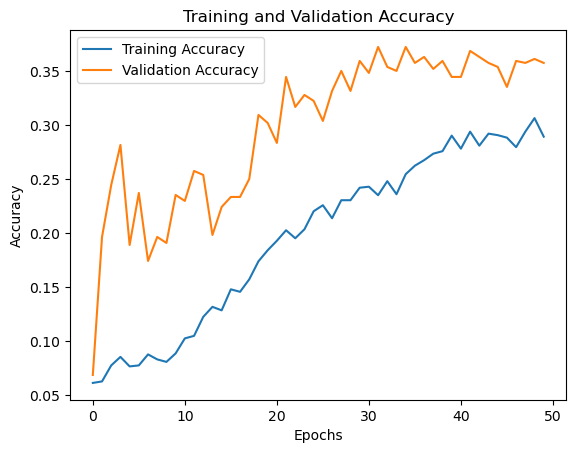

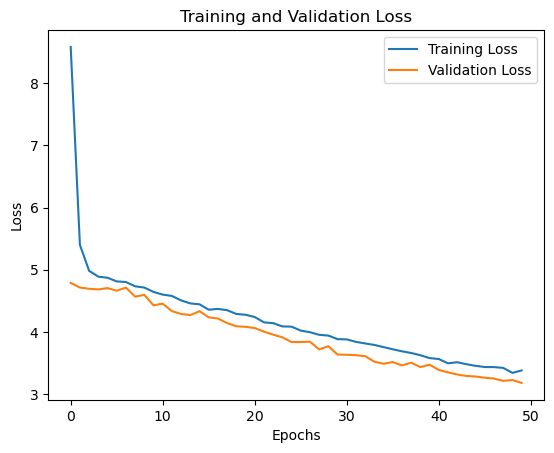

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()